<a href="https://colab.research.google.com/github/juangui96/DS-_-Boot-Camp/blob/main/Proyecto_Avance_IV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SUPER STORE - PREDICCION Y ANALISIS
Objetivo: Predecir cuales seran las ventas en los proximos periodos de tiempo de los *texto en cursiva* clientes, zonas y categoria de productos que se tiene en el
momento partiendo de una definicion de estado actual de las ventas.

# MOTIVACION Y AUDIENCIA
El resultado del presente analisis se espera, puedan presentarse a los lideres y jefes de las areas comerciales, esto con el fin de poder determinar las mejores estrategias y sinergias para obtener un crecimiento economico de la tienda en el proximo año. Asi mismo, se pretende que con el analisis actual o de linea base se pueda llegar a conocer mejor la situacion actual de la tienda.

# CONTEXTO COMERCIAL
En el momento se tienen los registros organizados de las ventas diarias de los productos vendidos de una cadena de tiendas en EEUU. Esta data incluye un horizonte de tiempo de 2015 a 2018, contiene datos importantes de la venta y del cliente (que se describen en el contexto analitico).
El esperado u objetivo es predecir cual sera el comportamiento de las ventas, teniendo el detalle de la region y de los clientes, con el fin de orientar correctamente las acciones comerciales, tales como: estrategias de marketing, negociacion o promociones, asi mismo, buscar posibles alianzas u ofrecer beneficios a los clientes que, por su historia, se espere tengan unas ventas destacadas en el futuro.

#CONTEXTO ANALITICO

Los registros de la ventas tiene un formato estructurado. El detalle de las ventas, contiene datos importantes como: detalle del lugar de venta(ciudad, estado, y region), el valor de la misma, la categoria y subcategoria del producto ademas de informacion basica de los clientes.
Las principales variables a tener en cuenta para predecir el comportamiento son:
Order Date

* Order Date
* Customer Name
* City/State
* Category
* Sales

De esta manera, se puede realizar un analisis de la situacion actual a partir de las siguientes preguntas

#PREGUNTAS/HIPOTESIS
Los clientes que generan una mayor cantitdad de ventas son clientes con un proemdio de valor de venta mayor

Existe un mes en el horizonte de tiempo en donde las ventas son pico

La diferencia entre el order date y el ship date depende de la categoria del ship mode

Existe una alta variabilidad para el set de datos que se esta analizando. Las ventas son proporcionales a la variabilidad.

Los productos tienen ventas complementarias entre los meses del analisis

# Cargue Librerias

In [450]:
#importar librerias
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [451]:
#ignorar warning

import warnings
warnings.filterwarnings("ignore")


In [452]:
#Librerias Plotly
! pip install chart_studio
import plotly.express as px
import plotly.graph_objects as go
import chart_studio.plotly as py


In [453]:
#mapa de calor
import folium
import folium
from folium.plugins import HeatMap

# CARGAR DATOS

In [454]:
url = 'https://raw.githubusercontent.com/juangui96/DS-_-Boot-Camp/main/Proyecto_Final/Actividad_1/super%20Store%20.csv'
ss = pd.read_csv(url, sep = ';')
ss.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,9.575.775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368


#EDA

Mediante la funcion ".info" se evidencia que no hay datos nulos (vacios), sin embargo los formatos de los datos no son correctos, en especial para la ultima columna Sales - Ventas, en la cual, se puede ver que el separados de millones y miles corresponde a un punto; por lo cual, no se detecta en formato numero impiidendo realizar operaciones matematicas. Las fechas comparten este mismo problema ya que no estan en el formato adecuado.

Estas ds variables son basicas para realizar la prediccion por lo cual, son las primeras que deben revisarse y normalizarse:

In [455]:
#Revision de datos vacios
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9799 entries, 0 to 9798
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9799 non-null   int64  
 1   Order ID       9799 non-null   object 
 2   Order Date     9799 non-null   object 
 3   Ship Date      9799 non-null   object 
 4   Ship Mode      9799 non-null   object 
 5   Customer ID    9799 non-null   object 
 6   Customer Name  9799 non-null   object 
 7   Segment        9799 non-null   object 
 8   Country        9799 non-null   object 
 9   City           9799 non-null   object 
 10  State          9799 non-null   object 
 11  Postal Code    9788 non-null   float64
 12  Region         9799 non-null   object 
 13  Product ID     9799 non-null   object 
 14  Category       9799 non-null   object 
 15  Sub-Category   9799 non-null   object 
 16  Product Name   9799 non-null   object 
 17  Sales          9794 non-null   object 
dtypes: float

In [456]:
#principales descriptores estadisticos
ss.describe()

,Row ID,Postal Code
count,9799.000000,9788.000000
mean,4900.981529,55272.581937
std,2828.903385,32042.776540
min,1.000000,1040.000000
25%,2451.500000,23223.000000
50%,4901.000000,58103.000000
75%,7350.500000,90008.000000
max,9800.000000,99301.000000


## Conversion en formato fecha
Para cambiar las columnas a formato date, se utiliza la funcion de pandas to_datetime en el fomato dd/mm/yyyy

In [457]:
ss['Order Date'] = pd.to_datetime(ss['Order Date'],format='%d/%m/%Y')
ss['Ship Date']= pd.to_datetime(ss['Ship Date'],format = '%d/%m/%Y')
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9799 entries, 0 to 9798
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9799 non-null   int64         
 1   Order ID       9799 non-null   object        
 2   Order Date     9799 non-null   datetime64[ns]
 3   Ship Date      9799 non-null   datetime64[ns]
 4   Ship Mode      9799 non-null   object        
 5   Customer ID    9799 non-null   object        
 6   Customer Name  9799 non-null   object        
 7   Segment        9799 non-null   object        
 8   Country        9799 non-null   object        
 9   City           9799 non-null   object        
 10  State          9799 non-null   object        
 11  Postal Code    9788 non-null   float64       
 12  Region         9799 non-null   object        
 13  Product ID     9799 non-null   object        
 14  Category       9799 non-null   object        
 15  Sub-Category   9799 n

## SALES nan O 0
Como se menciono previamente, a pesar de que no hay datos vacios si existen datos que no tienen el formato correcto, al revisar la primera funcion, se encuentra que existen 5 datos en la columna Postal Code y Sales que estan en "na", estos seran remplazados por 0 dado que la cantidad de filas con esta novedad es bastante baja a comparacion con el total del DF. ( 5 de 9798 registros).

Por otro lado el metodo de remplazar el valor NAN de la libreria numpy, no funciona, por lo cual se opta por utilizar el de pandas mediante la funcion isnull()

In [458]:
ss.replace(0,np.NaN,inplace=True)

In [459]:
null_columns=ss.columns[ss.isnull().any()]
ss[null_columns].isnull().sum()
print(ss[ss.isnull().any(axis=1)][null_columns].head())

      Postal Code Sales
429       28052.0   NaN
430       28052.0   NaN
1405      19143.0   NaN
1968      74133.0   NaN
1970      60623.0   NaN


In [460]:
for i in range(len(ss['Sales'])):
  if pd.isna(ss['Sales'][i]) == True:
    ss['Sales'][i] = 0
  if pd.isna(ss['Postal Code'][i]) == True:
    ss['Postal Code'][i]= 0

In [461]:
null_columns=ss.columns[ss.isnull().any()]
ss[null_columns].isnull().sum()
print(ss[ss.isnull().any(axis=1)][null_columns].head())

Empty DataFrame
Columns: []
Index: []


## Normalizar el formato de ventas
Para este paso, se trabaja bajo el supuesto que las ventas se encuentran en millones de unidades vendidas, por lo cual, el punto no se tendra en cuenta. Se remplaza el . por un vacio y luego se divide entre un millon cada registro. Finalmente, se verifica que, este tratamiento haya funcionado al utilizar el metodo: ".describe".

In [462]:
ss['Sales2'] = ss['Sales'].str.replace('.','').astype(float)
ss['Sales2'] = ss['Sales2'].astype(float)/1000000
ss.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Sales2
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,0.026196
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,0.073194
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,0.001462


In [463]:
ss.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales2
count,9799.000000,9799,9799,9799.000000,9794.000000
mean,4900.981529,2017-05-01 06:29:16.832329728,2017-05-05 05:33:17.469129472,55210.534953,0.113678
min,1.000000,2015-01-03 00:00:00,2015-01-07 00:00:00,0.000000,0.000003
25%,2451.500000,2016-05-24 12:00:00,2016-05-28 00:00:00,23223.000000,0.002537
50%,4901.000000,2017-06-26 00:00:00,2017-06-29 00:00:00,57401.000000,0.011096
75%,7350.500000,2018-05-15 00:00:00,2018-05-19 00:00:00,90008.000000,0.053996
max,9800.000000,2018-12-30 00:00:00,2019-01-05 00:00:00,99301.000000,23.962656
std,2828.903385,NaN,NaN,32078.229802,0.522018


#ANALISIS INICIAL

Lo primoero que se realiza es una agrupacion basica, para entender como pueden realizarse futuros procesamientos, los cuales son necesarios para crear visualizaciones. Se resalta que:

* Para la variable segmento existen tres tipos de categoria: Consumer, Corporate y Home Office
* Para la variable Ship Mode se tiene: First Class, Same Day, Second Class y Standard Class.
* Existen 4 regiones, las cuales su vez se dividen por ciudad (city) y estado (state). Todas comparten el mismo pais: Estados Unidos
* Se tiene una gran lista de 793 clientes, cada uno identificado por nombre y su correspondiente ID
* Los productos se encuentran categorizados en: Category (Furniture, Office Supplies y Technology) y Sub-Category

In [464]:
ss.groupby(['Ship Mode','Segment']).count()['Row ID']

Ship Mode       Segment    
First Class     Consumer        755
                Corporate       468
                Home Office     278
Same Day        Consumer        312
                Corporate       114
                Home Office     112
Second Class    Consumer       1003
                Corporate       588
                Home Office     310
Standard Class  Consumer       3031
                Corporate      1782
                Home Office    1046
Name: Row ID, dtype: int64

Total de ventas de 2015 a 2018 fue de 1113.3 millones de dolares

In [465]:
ss['Sales2'].sum()

1113.3633909999999

In [466]:
ss.groupby(['Region'])['Sales2'].sum()

Region
Central    314.654140
East       287.633228
South      150.860259
West       360.215764
Name: Sales2, dtype: float64

In [467]:
ss.groupby('Sub-Category')['Sales2'].sum()

Sub-Category
Accessories     37.038489
Appliances      25.730640
Art              8.559853
Binders        102.579053
Bookcases      198.019806
Chairs         181.085736
Copiers         63.044102
Envelopes        5.760244
Fasteners        1.065583
Furnishings     27.280390
Labels           2.913647
Machines        59.424089
Paper           23.149226
Phones         160.430598
Storage         64.148985
Supplies        16.637778
Tables         136.495172
Name: Sales2, dtype: float64

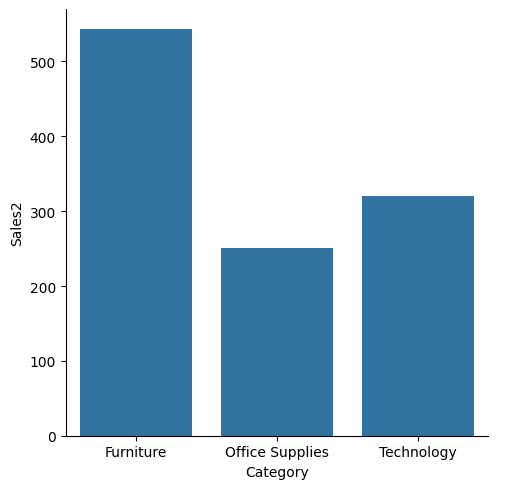

In [468]:
categorys= pd.DataFrame(ss.groupby('Category')['Sales2'].sum().reset_index())
categorys
ax=sns.catplot(x='Category',y='Sales2',kind='bar',data=categorys)

In [469]:
region1 = pd.DataFrame(ss.groupby(['Region','Category'])['Sales2'].sum().reset_index())
region1
px.bar(region1,y='Sales2',x='Region',color='Category',labels={'y':'Millones de Venta'},title='Ventas por Region')


A nivel general se evidencia que la categoria que mas ventas tiene corresponde a funirture. A su vez, la region que mas vende es la west, seguida de Central, East y South.  Este compartmiento se comparte para las 4 regiones, es decir, la categoria de producto mas vendida es Furniture.  

**Analisis SubCategoria**
La distribucion de la cantidad de ventas demuestra que a pesar que existen productos como los furnitures y papers que son los que mas se venden, no son los que mas ingresos generan. Podria pensarse en aumentar el precio o disminuirlo dependiendo de la competencia para asi abarcar una porcion de mercado mayor. Por su parte, productos como bookcases, chairs muestran una aparente frecuencia de venta media a pesar de que los ingresos por sus ventas son altos. En cuanto a los productos de la cola derecha, se muestra que tienen ingresos medios pero una frecuencia menor de venta

Por otro lado, las regiones central y west son lideres en las ventas de bookcases, siendo esta subcategoria la que presenta un comportamiento dominante

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'Bookcases'),
  Text(1, 0, 'Chairs'),
  Text(2, 0, 'Labels'),
  Text(3, 0, 'Tables'),
  Text(4, 0, 'Storage'),
  Text(5, 0, 'Furnishings'),
  Text(6, 0, 'Art'),
  Text(7, 0, 'Phones'),
  Text(8, 0, 'Binders'),
  Text(9, 0, 'Appliances'),
  Text(10, 0, 'Paper'),
  Text(11, 0, 'Accessories'),
  Text(12, 0, 'Envelopes'),
  Text(13, 0, 'Fasteners'),
  Text(14, 0, 'Supplies'),
  Text(15, 0, 'Machines'),
  Text(16, 0, 'Copiers')])

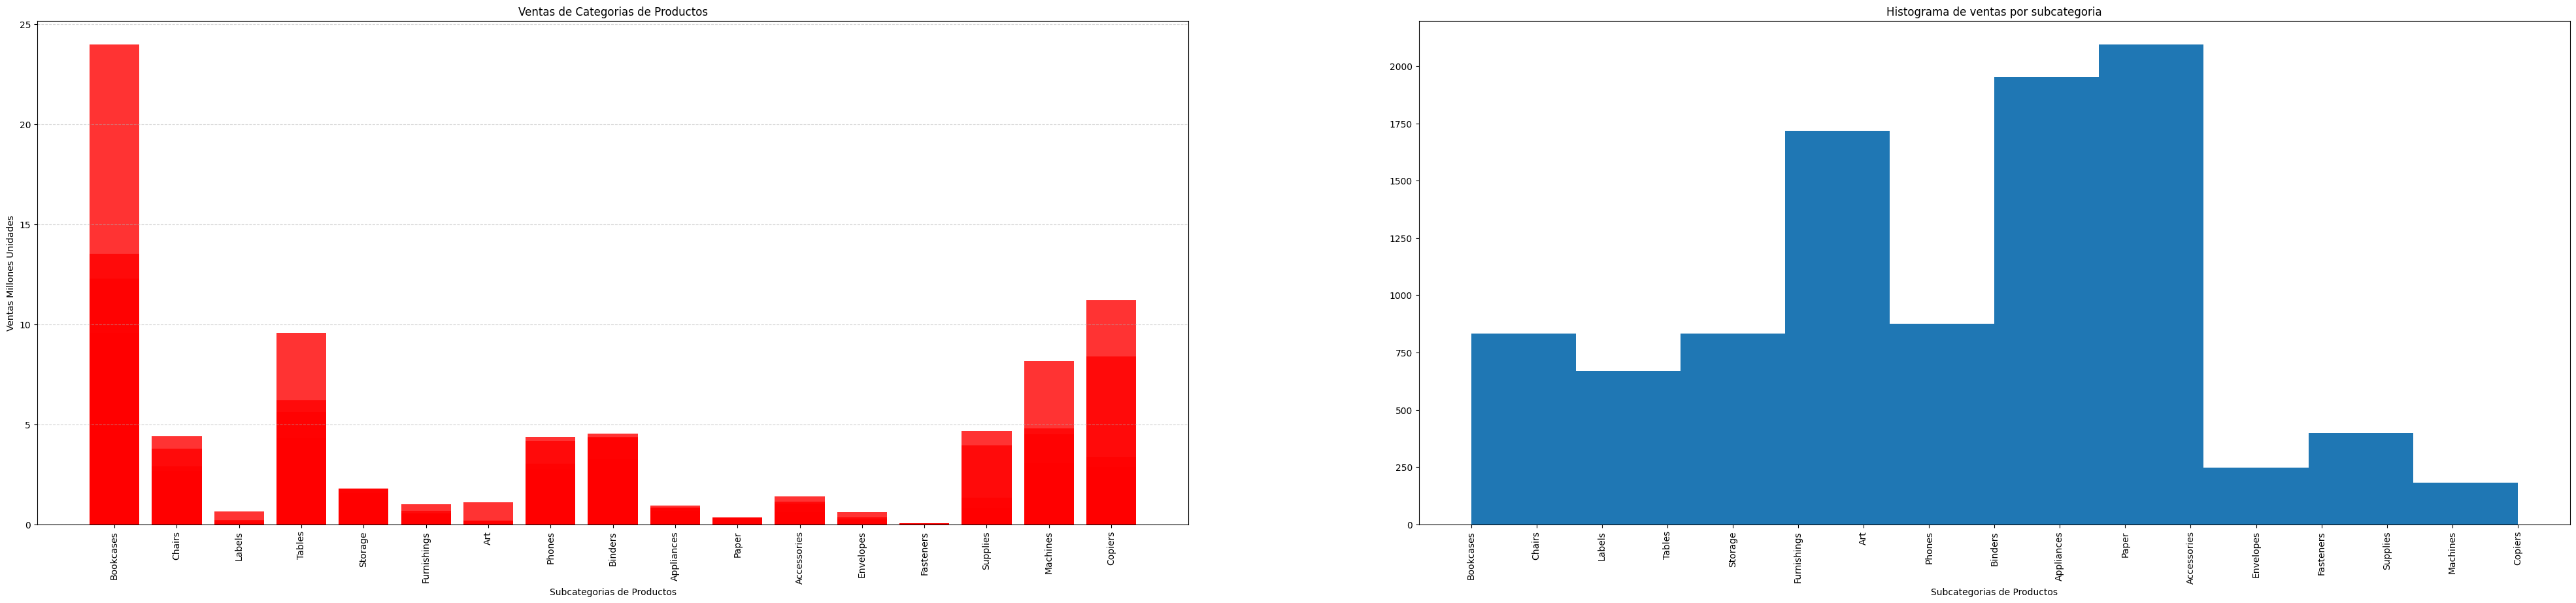

In [470]:
plt.figure(figsize=(50,10))
plt.subplot(1,2,1)
plt.bar(ss['Sub-Category'],ss['Sales2'], color = "red", alpha = 0.8)
plt.ylabel('Ventas Millones Unidades')
plt.xlabel('Subcategorias de Productos')
plt.xticks(rotation = 90)
plt.title('Ventas de Categorias de Productos')
plt.grid(axis = 'y',alpha=0.5, linestyle='--')
plt.subplot(1,2,2)
plt.hist(ss['Sub-Category'])
plt.xlabel('Subcategorias de Productos')
plt.title('Histograma de ventas por subcategoria')
plt.xticks(rotation = 90)

In [471]:
region1 = pd.DataFrame(ss.groupby(['Region','Sub-Category'])['Sales2'].sum().reset_index())
region1
px.bar(region1,y='Sales2',x='Region',color='Sub-Category',labels={'y':'Millones de Venta'},title='Ventas por Subcategoria en cada region')


**Productos** Al revisar la relacion entre Subcategoria y Categoria de producto, podria pensarse que es de tipo uno a uno, sin embargo, al analizar la tabla que se presenta a continuacion junto con la grafica, se puede ver que dentro de la cateogria furniture se comparten productos (Bookcase, Chairs, Table, Furnishing) y que, precisamente, estos son los productos que tienen unos ingreso smayores por ventas.  

In [472]:
cat_subcat = pd.DataFrame(ss.groupby(['Category','Sub-Category'])['Sales2'].sum().reset_index())
subcateg = ss['Sub-Category'].unique()
x = np.arange(len(subcateg))
pv2 = cat_subcat.pivot(index = 'Category' ,columns='Sub-Category',values = 'Sales2')
pv2

Sub-Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
Category,,,,,,,,,,,,,,,,,
Furniture,NaN,NaN,NaN,NaN,198.019806,181.085736,NaN,NaN,NaN,27.28039,NaN,NaN,NaN,NaN,NaN,NaN,136.495172
Office Supplies,NaN,25.73064,8.559853,102.579053,NaN,NaN,NaN,5.760244,1.065583,NaN,2.913647,NaN,23.149226,NaN,64.148985,16.637778,NaN
Technology,37.038489,NaN,NaN,NaN,NaN,NaN,63.044102,NaN,NaN,NaN,NaN,59.424089,NaN,160.430598,NaN,NaN,NaN


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


([<matplotlib.axis.XTick at 0x7cfb556db370>,
 [Text(0, 0, 'Accessories'),
  Text(1, 0, 'Appliances'),
  Text(2, 0, 'Art'),
  Text(3, 0, 'Binders'),
  Text(4, 0, 'Bookcases'),
  Text(5, 0, 'Chairs'),
  Text(6, 0, 'Copiers'),
  Text(7, 0, 'Envelopes'),
  Text(8, 0, 'Fasteners'),
  Text(9, 0, 'Furnishings'),
  Text(10, 0, 'Labels'),
  Text(11, 0, 'Machines'),
  Text(12, 0, 'Paper'),
  Text(13, 0, 'Phones'),
  Text(14, 0, 'Storage'),
  Text(15, 0, 'Supplies'),
  Text(16, 0, 'Tables')])

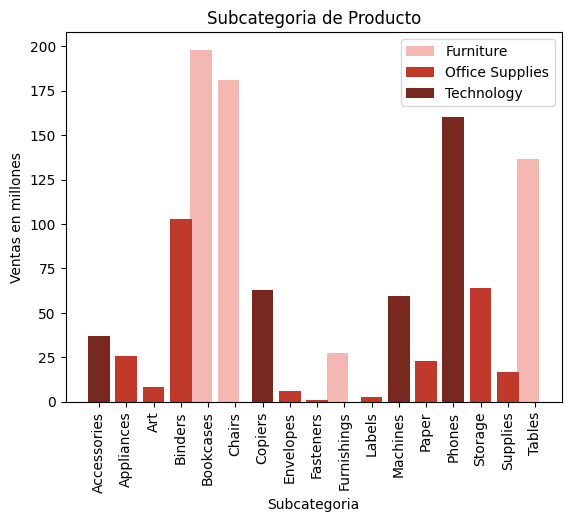

In [473]:
cat_subcat = pd.DataFrame(ss.groupby(['Category','Sub-Category'])['Sales2'].sum().reset_index())
pv2 = cat_subcat.pivot(index = 'Sub-Category', columns = 'Category', values = 'Sales2').reset_index()
labels = pv2['Sub-Category']
x = np.arange(len(labels))
print(x)
w = 0.25
plt.bar(x - w, pv2['Furniture'],label = 'Furniture', color = '#F5B7B1')
plt.bar(x, pv2['Office Supplies'], label = 'Office Supplies', color = '#C0392B')
plt.bar(x, pv2['Technology'], label = 'Technology', color = '#78281F')
plt.title('Subcategoria de Producto')
plt.ylabel('Ventas en millones')
plt.xlabel('Subcategoria')
plt.legend()
plt.xticks(rotation = 90, ticks= x, labels=labels)

**Ventas por Regiones** La variabilidad en cuanto a las ventas es alta, se tienen bastantes puntos outliers por lo cual deben retirarse como se muestra en el segundo grafico.Al quitar los datos atipicos, se muestra que, en general, el 50% de las ventas se mueven aproximadamente entre 50 mil y 10 mil dolares. Asi mismo se encuentra que la mayor dispersion de precios de ventas , se encuentra cuando el precio (valga la redundancia) es mayor a 15 mil dolares aproximadamente.

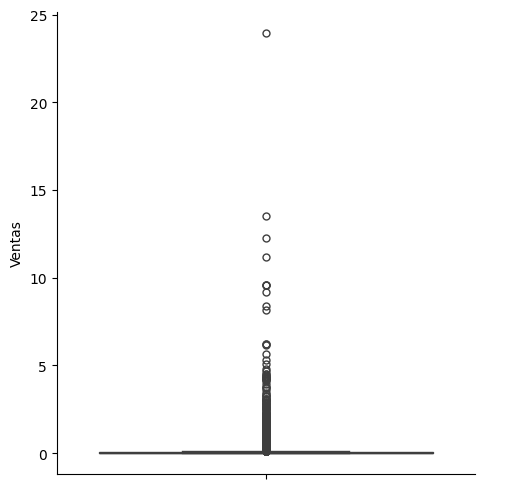

In [474]:
ax = sns.catplot(y = 'Sales2', data=ss, kind = 'box')
ax.tight_layout()
ax.set_ylabels("Ventas")
ax.set_titles()

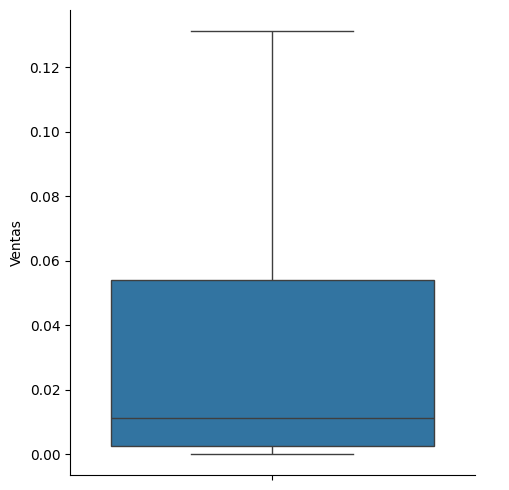

In [475]:
ax = sns.catplot(y = 'Sales2', data=ss, kind = 'box', showfliers = False)
ax.tight_layout()
ax.set_ylabels("Ventas")
ax.set_titles()

La region central es la que presenta una mayor cantidad de ventas con valores atipicos, seguida de la region este y sur. Lo anterior se confirmar al revisar las graficas de bigotes (boxplot) por cada region. Se identifica que, la region oeste es la que tiene una caja de mayor tamaño, y que la sur es la que presenta, aparentemente, unos valores mas concentrados. Las 4 regiones siguen el comportamiento previamente descrito en cuanto a la asimetria de los datos.

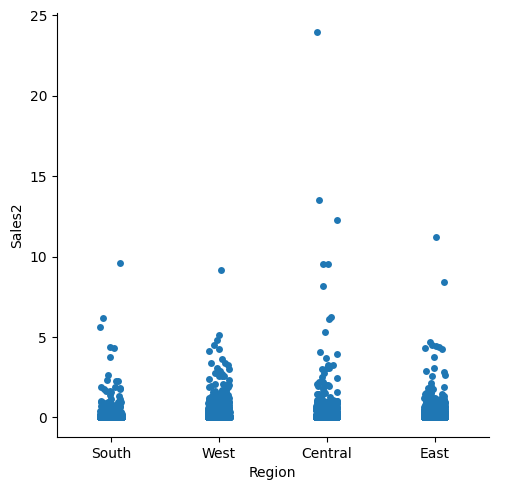

In [476]:
ax = sns.catplot(x = 'Region', y = 'Sales2', data=ss, kind = 'strip')

Al revisar las categorias de prodcutos, se encuentra que:

1. Deben ocultarse los outliers ya hay que valores bastantes altos
2. La region West presenta las cajas de mayor tamaño, (mayor variabilidad) por lo que se cumple lo previamente explicado.
3. La categoria Office Suppliers es la que presenta una menor variabilidad, se piensa que es debido a que no es el segmento que mas ventas presenta. Por su parte Furniture, dejando de lado la region west, aparentemente es el que presenta un comportamiento menos variable

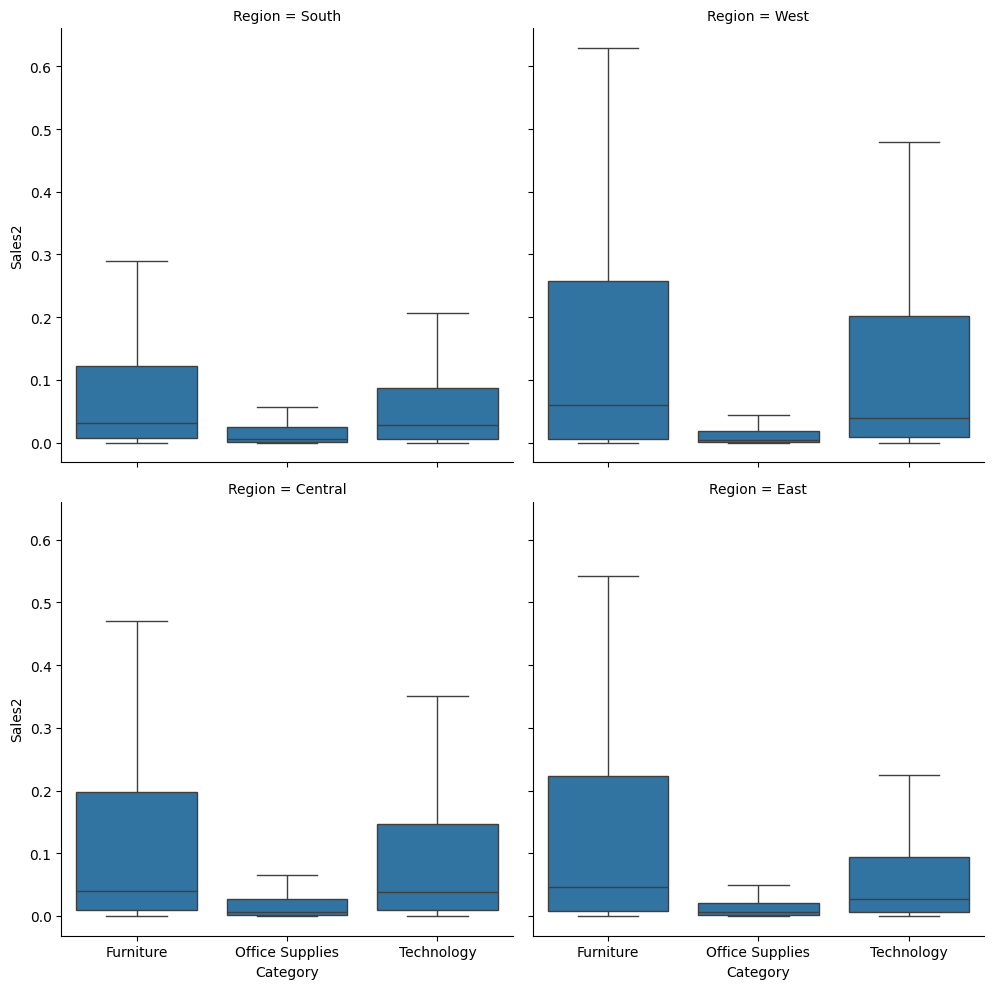

In [477]:
ax = sns.catplot(x = 'Category', y = 'Sales2', col = 'Region' ,data=ss, kind = 'box', showfliers = False, col_wrap=2)

**Analisis Temporal**
Con el fin de cumplir con el objetivo principal, se deben realizar analisis sobre el comportamiento temporal de las ventas en el tiemmpo. A nivel general, se identifica que existen picos muy marcados como Agosto 9 de 2017, asi mismo, se puede pensar que hay una tendencia leve a aumentar las ventas pero no se ve una estacionalidad tan marcada.

In [478]:
ss1 = ss[['Order Date','Segment','Sales2']]
ss1 = ss.groupby(['Order Date','Segment'])['Sales2'].sum()
ss1 = pd.DataFrame(ss1.reset_index()).sort_values(by = 'Order Date', ascending = True)
ss1['Order Date 2'] = pd.to_datetime(ss1['Order Date'], format='mixed')
ss1 = ss1.sort_values(by='Order Date 2', ascending = False)
px.line(ss1,x = 'Order Date 2',y = 'Sales2')

Se puede evidenciar tambien que el segundo semestre del año es el que mayor cantidad de ventas presenta, en especial en los meses 10 y 11. Se puede ver que la cantidad de ventas ha aumentado con el tiempo y que el ultimo año y medio (desde 2017) se ha tendido a tener una estabilizacion. El año mas "frio" fue 2016.

In [479]:
ss2 = ss1.pivot(index='Order Date 2',columns ='Segment', values = 'Sales2').reset_index()
ss2['Sales 2'] = ss2['Consumer'] + ss2['Corporate']+ss2['Home Office']
ss2['Month']=ss2['Order Date 2'].dt.month
ss2['Year']=ss2['Order Date 2'].dt.year
px.density_heatmap(ss2,x='Year',y='Month',z='Sales 2', marginal_y = 'histogram')

Esta grafica permite afirmar lo que se dijo previamente, el año 2016 es el que menos ventas ha presentado y que el 2018 y 2017 presentan un comportamiento "similar". Se evidencia que los meses de octubre, han sido , en general, meses en donde han habido picos negativos sin embargo, en el año 2018 se evidencia un incremento importante en el valor de ventas totales

In [480]:
ss3 = pd.DataFrame(ss2.groupby(['Month','Year'])['Sales 2'].sum().reset_index())
ss4 = pd.DataFrame(ss3.pivot(index='Month',columns='Year',values='Sales 2').reset_index())
px.line(ss4,x='Month',y=[2015, 2016, 2017, 2018],)

#HIPOTESIS


##HIPOTESIS 1:
Los clientes que generan una mayor cantitdad de ventas son clientes con un proemdio de valor de venta mayor

Para responde a la pregunta anterior, se propone un scatterplot en donde se evidencia que la mayoria de puntos no se agrupa en el cuadrante I, es decir en la parte superior derecha del grafico. Los puntos que representan las ventas con mayor valor se enceuntran ubicados en la parte inferior derecha (cudrante II) lo que quiere decir que son ventas por mayor valor economico pero en menor cantidad. Esto se comprueba al revisar la tabla ss2t en donde al organizar por el conteo de ventas,s e evidencia que no mas los 5 primeros clientes estan por debajo del valor de la venta.

In [481]:
ss2 = ss.pivot(columns='Customer Name',values = 'Sales2')
ss2 = ss2.describe()
ss2t = ss2.transpose().reset_index()
ss2t = ss2t.sort_values(by = 'count', ascending = False)
ss2t
px.scatter(ss2t, x='mean',y='count', color = 'Customer Name',size = 'mean',
           labels = {'count':'Cantidad de ventas','mean':'Ventas promedio(Millones)'},
           title = 'Cantidad de Ventas vs Promedio de venta por cliente',
           template = 'simple_white')

In [482]:
ss2t

,Customer Name,count,mean,std,min,25%,50%,75%,max
787,William Brown,35.0,0.112479,0.217597,0.001168,0.004807,0.010584,0.106140,0.892136
595,Paul Prost,34.0,0.036273,0.053072,0.000352,0.004944,0.016120,0.037518,0.234882
502,Matt Abelman,34.0,0.068969,0.178116,0.000198,0.002398,0.006525,0.026888,0.799984
387,John Lee,33.0,0.173800,0.549752,0.000468,0.001592,0.008626,0.054666,2.624985
145,Chloris Kastensmidt,32.0,0.075180,0.198875,0.000035,0.004676,0.010907,0.041900,1.039992
...,...,...,...,...,...,...,...,...,...
721,Sung Chung,1.0,0.014112,NaN,0.014112,0.014112,0.014112,0.014112,0.014112
123,Carl Jackson,1.0,0.001652,NaN,0.001652,0.001652,0.001652,0.001652,0.001652
53,Anthony O'Donnell,1.0,0.016128,NaN,0.016128,0.016128,0.016128,0.016128,0.016128
378,Jocasta Rupert,1.0,0.086388,NaN,0.086388,0.086388,0.086388,0.086388,0.086388


##HIPOTESIS 2
Existe un mes en el horizonte de tiempo en donde las ventas son pico

In [483]:
ss2 = ss
ss_h2 = ss2
ss_h2['Order Date']
ss_h2['Mes Venta'] = ss_h2['Order Date'].dt.month
ss_h2['Año Venta'] = ss_h2['Order Date'].dt.year

ss_h2.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Sales2,Mes Venta,Año Venta
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,0.026196,11,2017
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,0.073194,11,2017


In [484]:
filtro1_h2 = pd.DataFrame(ss_h2.groupby(['Mes Venta','Año Venta'])['Sales2'].sum().reset_index())
filtro1_h2.head(4)


,Mes Venta,Año Venta,Sales2
0,1,2015,2.882798
1,1,2016,23.146257
2,1,2017,8.077210
3,1,2018,16.985532


Text(0, 0.5, 'Ventas en millones')

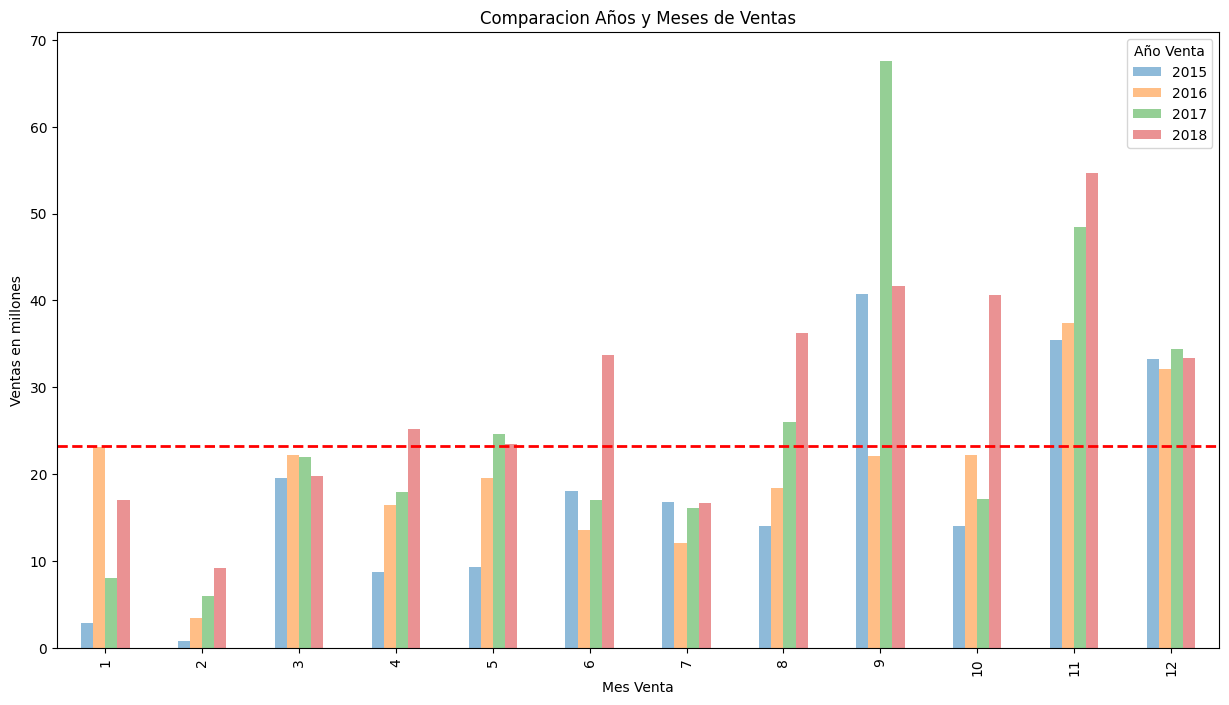

In [485]:
filtro2_h2 = filtro1_h2.pivot(columns='Año Venta', index='Mes Venta',  values='Sales2')

a = filtro2_h2.plot(kind='bar', alpha = 0.5, figsize=(15,8), title = 'Comparacion Años y Meses de Ventas')
a.axhline(y=np.mean(filtro1_h2['Sales2']), color='r', linestyle='--', linewidth=2, label ='Ventas promedio por mes')
a.set_ylabel('Ventas en millones')

Mediante la grafica anterior y la siguiente, se puede comprobar rapidamente que la hipotesis es correcta, el mes de Septiembre y Noviembre son los que tienen picos mas altos en cuanto a ventas. Se puede ver que el valor de ventas de los ultimos 6 meses del año esta por encima del valor de la venta promedio mes. Asi mismo Julio y Septiembre son los meses en donde menor actividad comercial se registra.

In [486]:
fig = px.bar(filtro1_h2, y ='Sales2', x='Mes Venta',color='Año Venta', title = 'Comparacion años y meses de Venta', labels = {'Sales2':'Ventas(Millones)'})
fig

##HIPOTESIS 3

La diferencia entre el order date y el ship date depende de la categoria del ship mode

In [487]:
ss_h3 = ss
ss_h3['Order Date2'] = pd.to_datetime(ss_h3['Order Date'],format='%d/%m/%Y')
ss_h3['Ship Date2'] = pd.to_datetime(ss_h3['Ship Date'],format='%d/%m/%Y')
ss_h3['Dif'] =ss['Ship Date2'] - ss_h3['Order Date2']
ss_h3.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Sales2,Mes Venta,Año Venta,Order Date2,Ship Date2,Dif
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,0.026196,11,2017,2017-11-08,2017-11-11,3 days
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,0.073194,11,2017,2017-11-08,2017-11-11,3 days


In [488]:
ss_h3['Dif2'] = ss['Dif']
ss_h3['Dif2'] = ss_h3['Dif2'].dt.days
ss_h3.dtypes
filtro1_h3 = pd.DataFrame(ss_h3.groupby(['Ship Mode','Dif2'])['Row ID'].count().reset_index())
filtro1_h3 = filtro1_h3.rename(columns = {'Row ID':'Cantidad de Ventas'})
filtro1_h3

,Ship Mode,Dif2,Cantidad de Ventas
0,First Class,1,338
1,First Class,2,557
2,First Class,3,605
3,First Class,4,1
4,Same Day,0,514
5,Same Day,1,24
6,Second Class,1,1
7,Second Class,2,738
8,Second Class,3,372
9,Second Class,4,367


In [489]:
filtro2_h3 = ss_h3[['Ship Mode','Dif2']]
px.box(filtro2_h3,x='Ship Mode',y='Dif2', points ='all' )

<Axes: xlabel='Dif2', ylabel='Density'>

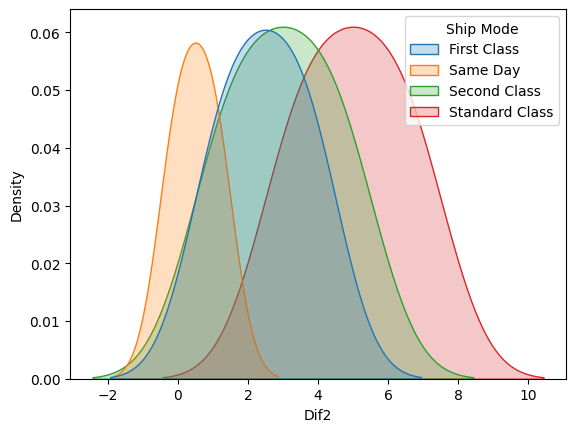

In [490]:
ax = sns.kdeplot(x='Dif2', hue='Ship Mode', data=filtro1_h3, fill=True)
ax

Mediante las graficas anteriores, se demuestra que, aparentemente la diferencia entre ship date y order date si depende del ship mode. A partir del box plot se puede ver que cada categoria tiene una media distinta y una variabilidad diferente. Los ship mode, standard class y second class comparten las misma variabilidad de dos dias, sin embargo el valor de la media es muy distinto, siendo de 5 y 3 dias respectivamente. Por otro lado, same day tiene una menor variabilidad sin embargo se resalta que hay ventas que no se entregaron el mismo dia a pesar de estar en esta categoria, tomando un tiempo maximo de envio de 1 dia. Lo anterior se complementa al revisar el segundo grafico, dado que cada campana tiene una ubicacion distinta, lo que indica que tienen variabilidades y medias diferentes. De no depender una variable de la otra, todas deberian compartir la misma ubicacion en el grafico

## HIPOTESIS 4
Existe una alta variabilidad para el set de datos que se esta analizando. Las ventas son proporcionales a la variabilidad.

In [491]:
ss3 = ss[['Order Date','Region','State','Category','Sales2']]
ss3['Order Date2']= pd.to_datetime(ss3['Order Date'],format='%d/%m/%Y')
ss3['Mes Venta'] = ss3['Order Date2'].dt.month
ss3['Año Venta'] = ss3['Order Date2'].dt.year

In [492]:
ss_h4 = pd.DataFrame(ss3.groupby(['Mes Venta','Año Venta'])['Sales2'].describe().reset_index())
ss_h4.head(2)

,Mes Venta,Año Venta,count,mean,std,min,25%,50%,75%,max
0,1,2015,77.0,0.037439,0.071482,0.000193,0.001278,0.005723,0.039198,0.333999
1,1,2016,57.0,0.406075,1.876504,0.000296,0.002904,0.010368,0.061584,13.523976


<Axes: xlabel='Mes Venta', ylabel='std'>

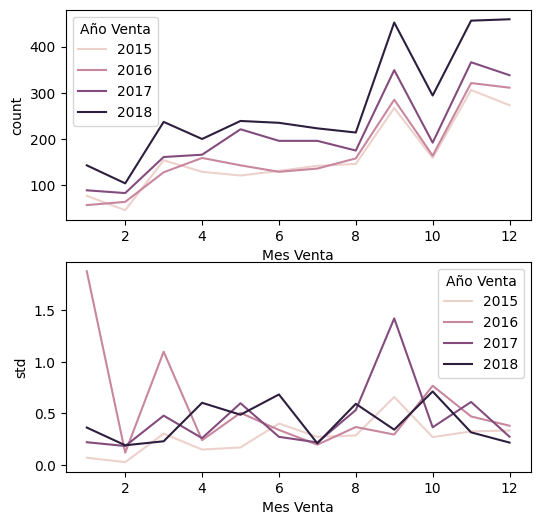

In [493]:
fig,ax = plt.subplots(nrows = 2, ncols=1, figsize=(6,6))
sns.lineplot(ss_h4, x ='Mes Venta', y = 'count', hue = 'Año Venta', ax=ax[0])
sns.lineplot(ss_h4, x ='Mes Venta', y = 'std', hue = 'Año Venta',ax=ax[1])

In [494]:
ss2_h4 = ss3[['Sales2','Año Venta','Mes Venta']]
px.box(ss2_h4,y='Sales2',color='Año Venta',points='all')

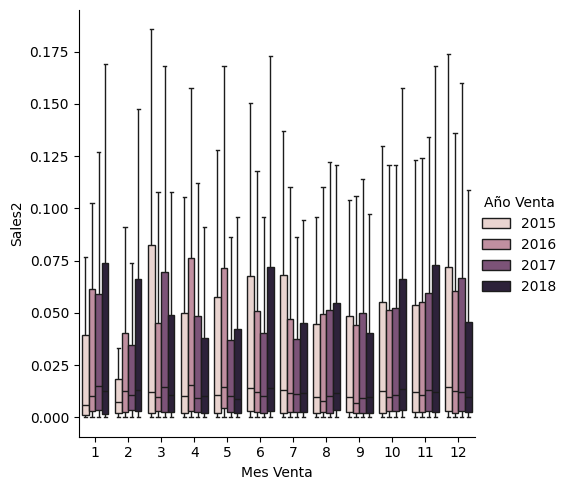

In [495]:
sns.catplot(x='Mes Venta',y='Sales2',hue='Año Venta',data=ss2_h4, kind ='box',showfliers=False)

In [496]:
ss3_h4 = ss3.groupby('Año Venta')['Sales2'].describe()
ss3_h4

,count,mean,std,min,25%,50%,75%,max
Año Venta,,,,,,,,
2015,1951.0,0.109502,0.362857,0.000008,0.002376,0.011179,0.056064,8.159952
2016,2055.0,0.118116,0.575936,0.000005,0.002592,0.010896,0.054998,13.523976
2017,2532.0,0.120670,0.659189,0.000003,0.002621,0.011232,0.052505,23.962656
2018,3256.0,0.107942,0.440100,0.000003,0.002515,0.010972,0.052053,11.199968


Al analizar los datos anteriores y en especial el conteo de ventas en el tiempo, se puede ver que existe una tendencia estacional; en los 4 años del analisis, se muestran picos (superiores en septiembre e inferiores en octubre). Posterior a lo cual se presenta un incremento para los meses de diciembre y enero. Por su parte, la variabilidad tiende a variar en el tiempo, aumentandose en los meses en donde las ventas crecen. Lo anterior se complementa al revisar la grafica de densidad de puntos en donde hay unos outliers bastante altos para cada año. Al revisar la grafica de box plot mensual, se evidencia que los meses 3 , 1, 7 y 6 son los que mayor variabilidad presentan. La media es bastante variable en especial en el mes de enero. La ultima tabla en donde se tienen los principales descriptores estadisticos de las ventas por año, muestra que, la variabilidad mas alta corresponde al año en donde se presentan ventas mas alta pero no mayor cantidad.

## HIPOTESIS 5

Los productos tienen  ventas complementarias entre los meses del analisis

In [497]:
ss4= ss3[['Mes Venta','Sales2','Año Venta','Category']]
ss4

,Mes Venta,Sales2,Año Venta,Category
0,11,0.026196,2017,Furniture
1,11,0.073194,2017,Furniture
2,6,0.001462,2017,Office Supplies
3,10,9.575775,2016,Furniture
4,10,0.022368,2016,Office Supplies
...,...,...,...,...
9794,5,0.003798,2017,Office Supplies
9795,1,0.010368,2016,Office Supplies
9796,1,0.235188,2016,Technology
9797,1,0.026376,2016,Technology


In [498]:
ss4_h5=pd.DataFrame(ss4.groupby(['Mes Venta','Category','Año Venta'])['Sales2'].sum().reset_index())
ss4_h5.head(4)

,Mes Venta,Category,Año Venta,Sales2
0,1,Furniture,2015,1.329197
1,1,Furniture,2016,20.059970
2,1,Furniture,2017,3.370981
3,1,Furniture,2018,2.839139


In [499]:
ss5_h5=pd.DataFrame(ss4.groupby(['Mes Venta','Category'])['Sales2'].sum().reset_index())
px.line(ss5_h5, x='Mes Venta', y='Sales2', color='Category', labels={'x': 'Mes Venta', 'y': 'Ventas en millones'})


In [500]:
filtro1_h5 =ss4_h5[ss4_h5['Año Venta']==2015]
filtro2_h5 =ss4_h5[ss4_h5['Año Venta']==2016]
filtro3_h5 =ss4_h5[ss4_h5['Año Venta']==2017]
filtro4_h5 =ss4_h5[ss4_h5['Año Venta']==2018]

filtro1_h5.head(3)

,Mes Venta,Category,Año Venta,Sales2
0,1,Furniture,2015,1.329197
4,1,Office Supplies,2015,1.253258
8,1,Technology,2015,0.300343


Text(0, 0.5, 'Ventas en 2018')

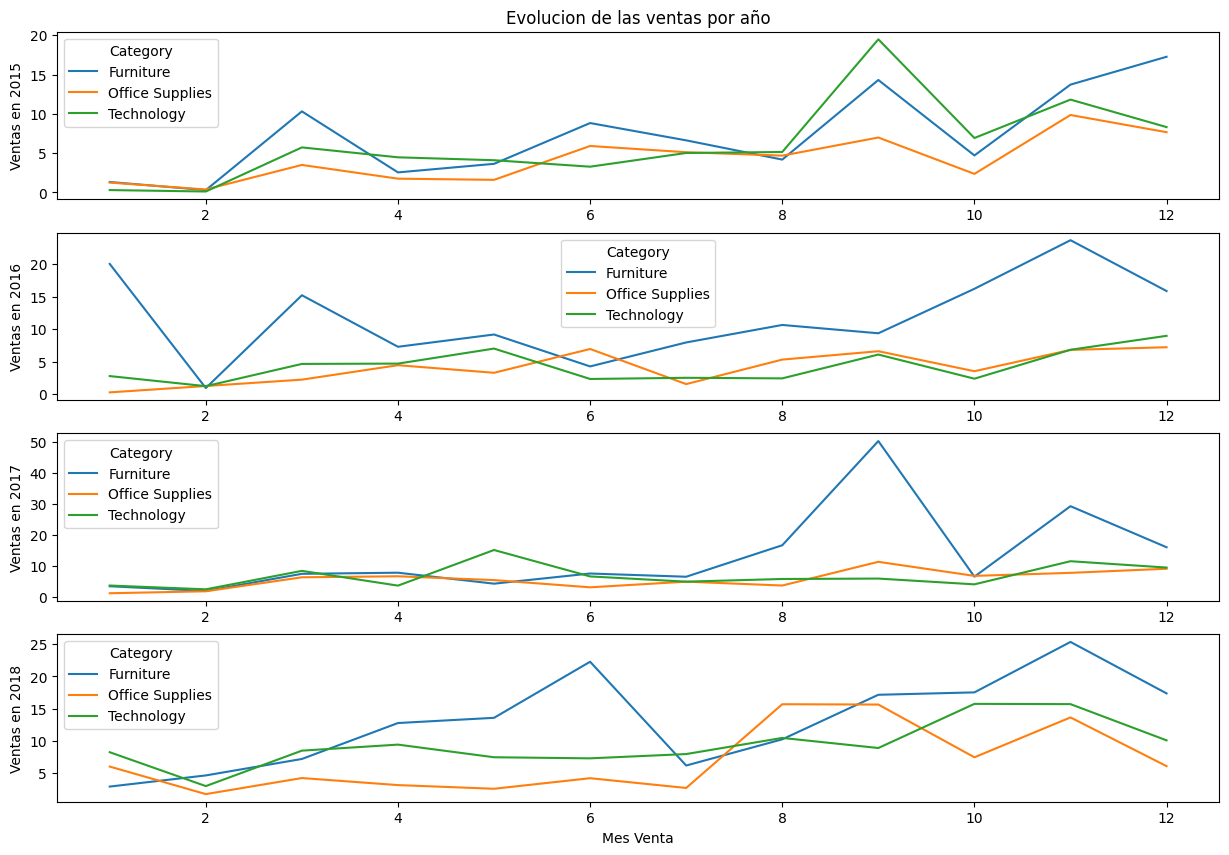

In [501]:
fig,ax = plt.subplots(nrows = 4, ncols=1, figsize=(15,10))
sns.lineplot(data=filtro1_h5,x='Mes Venta',y='Sales2',hue='Category',ax=ax[0])
sns.lineplot(data=filtro2_h5,x='Mes Venta',y='Sales2',hue='Category',ax=ax[1])
sns.lineplot(data=filtro3_h5,x='Mes Venta',y='Sales2',hue='Category',ax=ax[2])
sns.lineplot(data=filtro4_h5,x='Mes Venta',y='Sales2',hue='Category',ax=ax[3])

ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[2].set_xlabel('')
ax[3].set_xlabel('Mes Venta')

ax[0].set_ylabel('Ventas en 2015')
ax[1].set_ylabel('Ventas en millones')
ax[2].set_ylabel('Ventas en millones')
ax[3].set_ylabel('Ventas en millones')


ax[0].set_title('Evolucion de las ventas por año')
ax[1].set_ylabel('Ventas en 2016')
ax[2].set_ylabel('Ventas en 2017')
ax[3].set_ylabel('Ventas en 2018')

Al revisar el comportamiento de las ventas totalizados por mes, se ve que la categoria furniture tiene unas ventas mucho mayores a las otras dos, por lo que en general no tiene un mes en donde sus ventas disminuyan y las de las demas categorias aumenta, unicamente hay un mes (Mayo) en donde se presenta este comportamiento con las ventas de tecnologia. Por otro lado, esta ultima categoria si presenta un comportamiento de ventas complementario con office supplies, en especial en los meses de: Abril, Mayo, Junio, Julio y Agosto (es importante resaltar que la diferencia entre estas dos categorias es bastante notoria, en especial, en el primer semestre de los años analizados). Finalmente, al revisar las graficas en donde estan las ventas anualizadas se encuentra que:

En 2015 las ventas de furniture fueron superadas por las de office supllies, y en general, las 3 categorias presentaban un comportamiento similar, con ventas complementarias en abrilmayo y junio.
A partir de 2016 la categoria Furniture resalta sobre las demas. Es decir, el total de sus ventas mensuales es mucho mayor al de las demas categorias. Lo que muestra ventas complementarias en octubre, marzo , mayo y julio.
El año 2017 en el mes de septiembre se presenta el pico mas alto de ventas (para todos los meses y años) en la categoria furniture lo que puede llevar a pensar que es un dato atipico. Este año presetna venta complmenetarias entre office supplies y technology en abril, mayo, junio, agosto, septiembre
El ultimo añoñ del analsisi, musetra un comportamiento al alza en especial durante el segundo semeestre del año. En general hay ventas complementarias en el mes de junio (entre furnitrue y las otras dos catgeorias), en agosto (entre officel supplies y las demas categorias) y en octubre (entre technology y las demas categorias). Se puede decir que este añ es el que mejor comportamiento presenta.


#OTRAS VISUALIZACIONES
Se genera un mapa de calor basico para confirmar lo que se afirma sobre las regiones. Se pretende tambien que este pueda cambiar en el tiempo, sin embargo, este es el primer avance de ese objetivo, mostrando el total por ciudad de las ventas de 2015 a 2018.

In [502]:
pd.DataFrame(ss['City'].unique())

,0
0,Henderson
1,Los Angeles
2,Fort Lauderdale
3,Concord
4,Seattle
...,...
524,Oswego
525,Coon Rapids
526,San Clemente
527,San Luis Obispo


In [503]:
ss[['City','State','Postal Code','Sales']]

,City,State,Postal Code,Sales
0,Henderson,Kentucky,42420.0,261.96
1,Henderson,Kentucky,42420.0,731.94
2,Los Angeles,California,90036.0,14.62
3,Fort Lauderdale,Florida,33311.0,9.575.775
4,Fort Lauderdale,Florida,33311.0,22.368
...,...,...,...,...
9794,Chicago,Illinois,60610.0,3.798
9795,Toledo,Ohio,43615.0,10.368
9796,Toledo,Ohio,43615.0,235.188
9797,Toledo,Ohio,43615.0,26.376


In [504]:
pd.DataFrame(ss.groupby(['City','Postal Code'])['Sales'].count())

,,Sales
City,Postal Code,
Aberdeen,57401.0,1
Abilene,79605.0,1
Akron,44312.0,20
Albuquerque,87105.0,14
Alexandria,22304.0,16
...,...,...
Woonsocket,2895.0,4
Yonkers,10701.0,15
York,17403.0,5


In [505]:
!pip install pgeocode
import pgeocode

In [506]:
p_c = pd.DataFrame(ss['Postal Code'].drop_duplicates().reset_index()).astype(int)
p_c = pd.DataFrame(p_c['Postal Code'])
p_c['Postal Code']=p_c['Postal Code'].astype("string")
p_c

,Postal Code
0,42420
1,90036
2,33311
3,90032
4,28027
...,...
622,55433
623,92672
624,94568
625,93405


In [507]:
a = list(p_c['Postal Code'])

In [508]:
nomi = pgeocode.Nominatim('US')
lat_long = nomi.query_postal_code(a)
lat_long['postal_code']=lat_long['postal_code'].astype(float)

In [509]:
lat_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   postal_code     627 non-null    float64
 1   country_code    575 non-null    object 
 2   place_name      575 non-null    object 
 3   state_name      575 non-null    object 
 4   state_code      575 non-null    object 
 5   county_name     575 non-null    object 
 6   county_code     575 non-null    float64
 7   community_name  0 non-null      object 
 8   community_code  0 non-null      float64
 9   latitude        575 non-null    float64
 10  longitude       575 non-null    float64
 11  accuracy        575 non-null    float64
dtypes: float64(6), object(6)
memory usage: 58.9+ KB


In [510]:
ss.columns.values

array(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City',
       'State', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Sales2', 'Mes Venta',
       'Año Venta', 'Order Date2', 'Ship Date2', 'Dif', 'Dif2'],
      dtype=object)

In [511]:
ss_map= ss[['Order Date','City','State','Postal Code','Category','Sales2']]
ss_map = ss_map.merge(lat_long,how='left',left_on='Postal Code',right_on='postal_code')
ss_map.isnull().sum()

Order Date           0
City                 0
State                0
Postal Code          0
Category             0
Sales2               5
postal_code          0
country_code       440
place_name         440
state_name         440
state_code         440
county_name        440
county_code        440
community_name    9799
community_code    9799
latitude           440
longitude          440
accuracy           440
dtype: int64

In [512]:
for i in range(len(ss_map['Sales2'])):
  if pd.isna(ss_map['Sales2'][i]) == True:
    ss_map['Sales2'][i] = 0

In [514]:
ss_map1 = ss_map.dropna(subset=['latitude','longitude','Sales2'])
ss_map1.isnull().sum()

Order Date           0
City                 0
State                0
Postal Code          0
Category             0
Sales2               0
postal_code          0
country_code         0
place_name           0
state_name           0
state_code           0
county_name          0
county_code          0
community_name    9359
community_code    9359
latitude             0
longitude            0
accuracy             0
dtype: int64

In [515]:
folium_hmap = folium.Map(location=[48,-102],
                         zoom_start=5,
                         tiles="OpenStreetMap")
hm_wide= HeatMap(list(zip(ss_map1['latitude'],ss_map1['longitude'],ss_map1['Sales2'])),
                 min_opacity=0.8,
                 radius=10,blur=6,
                 max_zoom=15,)
folium_hmap.add_child(hm_wide)